<a href="https://colab.research.google.com/github/amardeep786/Regressors/blob/main/RegressorDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
import ast
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.cluster import KMeans


In [ ]:
df = pd.read_csv('/content/sample_data/updated_file_Detect.csv')
df.head()

<ipython-input-2-ee47942555e1>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sample_data/updated_file_Detect.csv')


,Image No,Image Pixel,Processing Time,Iteration,Combination,Current Script,Execution Time (seconds),RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),...,Total RAM (GB),Total CPU Cores,Total GPU Memory (GB),CPU Model,GPU Model,CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,File,Duration
0,1.0,448x640,40.6,1,d,detect.py,15.246717,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,...,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,NaN,NaN
1,2.0,640x608,42.6,1,d,detect.py,15.246717,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,...,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,NaN,NaN
2,3.0,512x640,41.3,1,d,detect.py,15.246717,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,...,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,NaN,NaN
3,4.0,640x480,40.6,1,d,detect.py,15.246717,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,...,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,NaN,NaN
4,5.0,640x448,40.0,1,d,detect.py,15.246717,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,...,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,NaN,NaN


In [ ]:
print(df.columns)


Index(['Image No', 'Image Pixel', 'Processing Time', 'Iteration',
       'Combination', 'Current Script', 'Execution Time (seconds)',
       'RAM Memory Usage (MB)', 'CPU Usage Per Core', 'GPU Usage (%)',
       'GPU Memory Usage (MB)', 'Total RAM (GB)', 'Total CPU Cores',
       'Total GPU Memory (GB)', 'CPU Model', 'GPU Model',
       'CPU Clock Speed (MHz)', 'GPU Clock Speed (MHz)',
       'Number of Cores Used', 'File', 'Duration'],
      dtype='object')


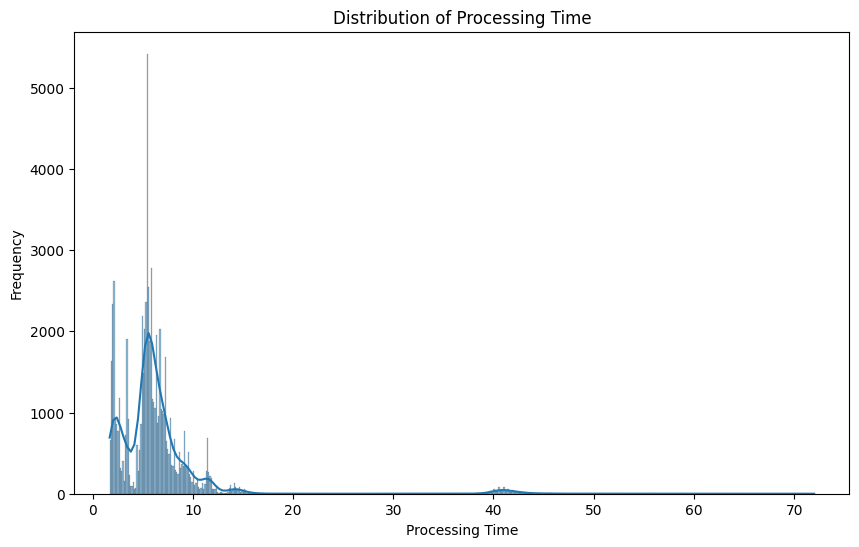

Distribution Counts:
Processing Time
1.7       13
1.8      654
1.9     1634
2.0     2338
2.1     1613
        ... 
63.0       1
63.3       1
66.6       1
66.8       1
72.0       1
Name: count, Length: 329, dtype: int64


In [ ]:


# Assuming your DataFrame is named 'df' and the column is 'Processing Time'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Processing Time'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time')
plt.ylabel('Frequency')
plt.show()

# Get the count of each distribution using value_counts()
distribution_counts = df['Processing Time'].value_counts().sort_index()
print("Distribution Counts:")
print(distribution_counts)

In [ ]:
df = df[df['Processing Time'] <= 20]

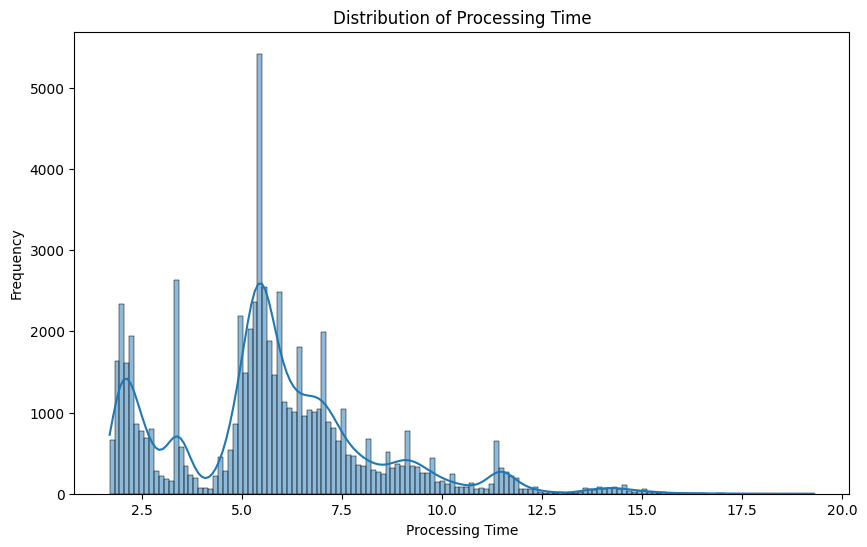

Distribution Counts:
Processing Time
1.7       13
1.8      654
1.9     1634
2.0     2338
2.1     1613
        ... 
18.6       2
18.7       1
18.8       1
19.0       1
19.3       1
Name: count, Length: 165, dtype: int64


In [ ]:


# Assuming your DataFrame is named 'df' and the column is 'Processing Time'
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.histplot(df['Processing Time'], kde=True)  # kde=True adds a kernel density estimate
plt.title('Distribution of Processing Time')
plt.xlabel('Processing Time')
plt.ylabel('Frequency')
plt.show()

# Get the count of each distribution using value_counts()
distribution_counts = df['Processing Time'].value_counts().sort_index()
print("Distribution Counts:")
print(distribution_counts)

In [ ]:
columns_to_drop = ['Image No','Iteration','Execution Time (seconds)','File','Duration']

In [ ]:
df = df.drop(columns=columns_to_drop)

In [ ]:
df.columns

Index(['Image Pixel', 'Processing Time', 'Combination', 'Current Script',
       'RAM Memory Usage (MB)', 'CPU Usage Per Core', 'GPU Usage (%)',
       'GPU Memory Usage (MB)', 'Total RAM (GB)', 'Total CPU Cores',
       'Total GPU Memory (GB)', 'CPU Model', 'GPU Model',
       'CPU Clock Speed (MHz)', 'GPU Clock Speed (MHz)',
       'Number of Cores Used'],
      dtype='object')

In [ ]:
y = df['Processing Time']

In [ ]:
X = df.drop(columns=['Processing Time'])

In [ ]:
X.head()

,Image Pixel,Combination,Current Script,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total CPU Cores,Total GPU Memory (GB),CPU Model,GPU Model,CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used
5,448x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3
6,640x448,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3
7,640x480,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3
8,512x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3
11,480x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3


In [ ]:
y.head()

,Processing Time
5,5.3
6,5.2
7,5.2
8,5.4
11,4.9


In [ ]:
print(X.dtypes)

Image Pixel               object
Combination               object
Current Script            object
RAM Memory Usage (MB)    float64
CPU Usage Per Core        object
GPU Usage (%)              int64
GPU Memory Usage (MB)    float64
Total RAM (GB)           float64
Total CPU Cores            int64
Total GPU Memory (GB)      int64
CPU Model                 object
GPU Model                 object
CPU Clock Speed (MHz)    float64
GPU Clock Speed (MHz)      int64
Number of Cores Used       int64
dtype: object


In [ ]:
# Split 'Image Pixel' into 'width' and 'height'
X[['width', 'height']] = X['Image Pixel'].str.split('x', expand=True).astype(int)

In [ ]:
# Create 'image_size' as width multiplied by height
X['image_size'] = X['width'] * X['height']


In [ ]:
X.head()

,Image Pixel,Combination,Current Script,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total CPU Cores,Total GPU Memory (GB),CPU Model,GPU Model,CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,image_size
5,448x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,448,640,286720
6,640x448,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,640,448,286720
7,640x480,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,640,480,307200
8,512x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,512,640,327680
11,480x640,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,480,640,307200


In [ ]:
X = X.drop(columns=['Image Pixel'])

In [ ]:
X.head()

,Combination,Current Script,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total CPU Cores,Total GPU Memory (GB),CPU Model,GPU Model,CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,image_size
5,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,448,640,286720
6,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,640,448,286720
7,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,640,480,307200
8,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,512,640,327680
11,d,detect.py,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,32,24,Intel(R) Xeon(R) Gold 6226R CPU,NVIDIA RTX A5000,2900.0,2100,3,480,640,307200


In [ ]:
X = X.drop(columns=['Current Script','Total CPU Cores'])

In [ ]:
X.columns

Index(['Combination', 'RAM Memory Usage (MB)', 'CPU Usage Per Core',
       'GPU Usage (%)', 'GPU Memory Usage (MB)', 'Total RAM (GB)',
       'Total GPU Memory (GB)', 'CPU Model', 'GPU Model',
       'CPU Clock Speed (MHz)', 'GPU Clock Speed (MHz)',
       'Number of Cores Used', 'width', 'height', 'image_size'],
      dtype='object')

###Now Do encodings of categorical data

In [ ]:
categorical_data = ['CPU Model','GPU Model']  #do one hot encoding
encoder = pd.get_dummies(X[categorical_data])

# Concatenate the encoded features with the original DataFrame
X = pd.concat([X, encoder], axis=1)

# Drop the original categorical columns
X = X.drop(columns=categorical_data)

In [ ]:
X.head()

,Combination,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total GPU Memory (GB),CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,image_size,CPU Model_AMD Ryzen 9 7950X,CPU Model_Intel(R) Xeon(R) Gold 6226R CPU,GPU Model_NVIDIA GeForce RTX 4080,GPU Model_NVIDIA RTX A5000
5,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,448,640,286720,False,True,False,True
6,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,448,286720,False,True,False,True
7,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,480,307200,False,True,False,True
8,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,512,640,327680,False,True,False,True
11,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,480,640,307200,False,True,False,True


In [ ]:
#capture each instance
X['num_p'] = X['Combination'].str.count('p')
X['num_s'] = X['Combination'].str.count('s')
X['num_d'] = X['Combination'].str.count('d')

In [ ]:
X.head()

,Combination,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total GPU Memory (GB),CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,image_size,CPU Model_AMD Ryzen 9 7950X,CPU Model_Intel(R) Xeon(R) Gold 6226R CPU,GPU Model_NVIDIA GeForce RTX 4080,GPU Model_NVIDIA RTX A5000,num_p,num_s,num_d
5,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,448,640,286720,False,True,False,True,0,0,1
6,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,448,286720,False,True,False,True,0,0,1
7,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,480,307200,False,True,False,True,0,0,1
8,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,512,640,327680,False,True,False,True,0,0,1
11,d,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,480,640,307200,False,True,False,True,0,0,1


In [ ]:
X = X.drop(columns=['Combination'])

In [ ]:
X.head()

,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total GPU Memory (GB),CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,image_size,CPU Model_AMD Ryzen 9 7950X,CPU Model_Intel(R) Xeon(R) Gold 6226R CPU,GPU Model_NVIDIA GeForce RTX 4080,GPU Model_NVIDIA RTX A5000,num_p,num_s,num_d
5,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,448,640,286720,False,True,False,True,0,0,1
6,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,448,286720,False,True,False,True,0,0,1
7,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,480,307200,False,True,False,True,0,0,1
8,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,512,640,327680,False,True,False,True,0,0,1
11,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,480,640,307200,False,True,False,True,0,0,1


In [ ]:
type(X['CPU Usage Per Core'])

pandas.core.series.Series

In [ ]:
# Convert string representations to lists if necessary
X['CPU Usage Per Core'] = X['CPU Usage Per Core'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Define CPU core column names
cpu_columns = [f'cpu_core_{i+1}' for i in range(32)]

# Expand the list into separate columns
X[cpu_columns] = pd.DataFrame(X['CPU Usage Per Core'].tolist(), columns=cpu_columns, index=X.index)

# (Optional) Drop the original 'CPU Usage Per Core' column
#X = X.drop('CPU Usage Per Core', axis=1)


In [ ]:
X.head()

,RAM Memory Usage (MB),CPU Usage Per Core,GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total GPU Memory (GB),CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,...,cpu_core_23,cpu_core_24,cpu_core_25,cpu_core_26,cpu_core_27,cpu_core_28,cpu_core_29,cpu_core_30,cpu_core_31,cpu_core_32
5,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,512,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1350.964844,"[0.0, 0.0, 0.0, 0.0, 9.1, 0.0, 0.0, 0.0, 0.0, ...",35,1.058594,256.0,24,2900.0,2100,3,480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = X.drop(columns=['CPU Usage Per Core'])
X.head()

,RAM Memory Usage (MB),GPU Usage (%),GPU Memory Usage (MB),Total RAM (GB),Total GPU Memory (GB),CPU Clock Speed (MHz),GPU Clock Speed (MHz),Number of Cores Used,width,height,...,cpu_core_23,cpu_core_24,cpu_core_25,cpu_core_26,cpu_core_27,cpu_core_28,cpu_core_29,cpu_core_30,cpu_core_31,cpu_core_32
5,1350.964844,35,1.058594,256.0,24,2900.0,2100,3,448,640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1350.964844,35,1.058594,256.0,24,2900.0,2100,3,640,448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1350.964844,35,1.058594,256.0,24,2900.0,2100,3,640,480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1350.964844,35,1.058594,256.0,24,2900.0,2100,3,512,640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1350.964844,35,1.058594,256.0,24,2900.0,2100,3,480,640,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X.columns

Index(['RAM Memory Usage (MB)', 'GPU Usage (%)', 'GPU Memory Usage (MB)',
       'Total RAM (GB)', 'Total GPU Memory (GB)', 'CPU Clock Speed (MHz)',
       'GPU Clock Speed (MHz)', 'Number of Cores Used', 'width', 'height',
       'image_size', 'CPU Model_AMD Ryzen 9 7950X',
       'CPU Model_Intel(R) Xeon(R) Gold 6226R CPU',
       'GPU Model_NVIDIA GeForce RTX 4080', 'GPU Model_NVIDIA RTX A5000',
       'num_p', 'num_s', 'num_d', 'cpu_core_1', 'cpu_core_2', 'cpu_core_3',
       'cpu_core_4', 'cpu_core_5', 'cpu_core_6', 'cpu_core_7', 'cpu_core_8',
       'cpu_core_9', 'cpu_core_10', 'cpu_core_11', 'cpu_core_12',
       'cpu_core_13', 'cpu_core_14', 'cpu_core_15', 'cpu_core_16',
       'cpu_core_17', 'cpu_core_18', 'cpu_core_19', 'cpu_core_20',
       'cpu_core_21', 'cpu_core_22', 'cpu_core_23', 'cpu_core_24',
       'cpu_core_25', 'cpu_core_26', 'cpu_core_27', 'cpu_core_28',
       'cpu_core_29', 'cpu_core_30', 'cpu_core_31', 'cpu_core_32'],
      dtype='object')

##Feature Selection and Dimensionality Reduction

In [ ]:
# Define CPU usage columns
cpu_columns = [f'cpu_core_{i}' for i in range(1, 33)]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the CPU usage data
X_cpu_scaled = scaler.fit_transform(X[cpu_columns])

In [ ]:
# Initialize PCA to capture 95% of the variance
pca_optimal = PCA(n_components=0.95, random_state=42)

# Fit PCA on the scaled CPU usage data
X_cpu_pca_optimal = pca_optimal.fit_transform(X_cpu_scaled)

# Number of components selected to retain 95% variance
print(f"Number of PCA components to retain 95% variance: {pca_optimal.n_components_}")

# Create PCA component names
pca_optimal_columns = [f'cpu_pca_optimal_{i+1}' for i in range(X_cpu_pca_optimal.shape[1])]

# Create a DataFrame for the PCA components
cpu_pca_optimal_df = pd.DataFrame(X_cpu_pca_optimal, columns=pca_optimal_columns, index=X.index)

# Concatenate the PCA components with the original DataFrame
X = pd.concat([X, cpu_pca_optimal_df], axis=1)

Number of PCA components to retain 95% variance: 26


In [ ]:
# Drop the original CPU usage columns to reduce dimensionality
X = X.drop(cpu_columns, axis=1)

print("Optimal PCA Components Added:")
print(cpu_pca_optimal_df.head())

Optimal PCA Components Added:
    cpu_pca_optimal_1  cpu_pca_optimal_2  cpu_pca_optimal_3  \
5           -2.231515           0.236621          -0.274898   
6           -2.231515           0.236621          -0.274898   
7           -2.231515           0.236621          -0.274898   
8           -2.231515           0.236621          -0.274898   
11          -2.231515           0.236621          -0.274898   

    cpu_pca_optimal_4  cpu_pca_optimal_5  cpu_pca_optimal_6  \
5            0.466242           0.327196          -0.040894   
6            0.466242           0.327196          -0.040894   
7            0.466242           0.327196          -0.040894   
8            0.466242           0.327196          -0.040894   
11           0.466242           0.327196          -0.040894   

    cpu_pca_optimal_7  cpu_pca_optimal_8  cpu_pca_optimal_9  \
5           -0.080393          -0.330103           0.062517   
6           -0.080393          -0.330103           0.062517   
7           -0.080393  

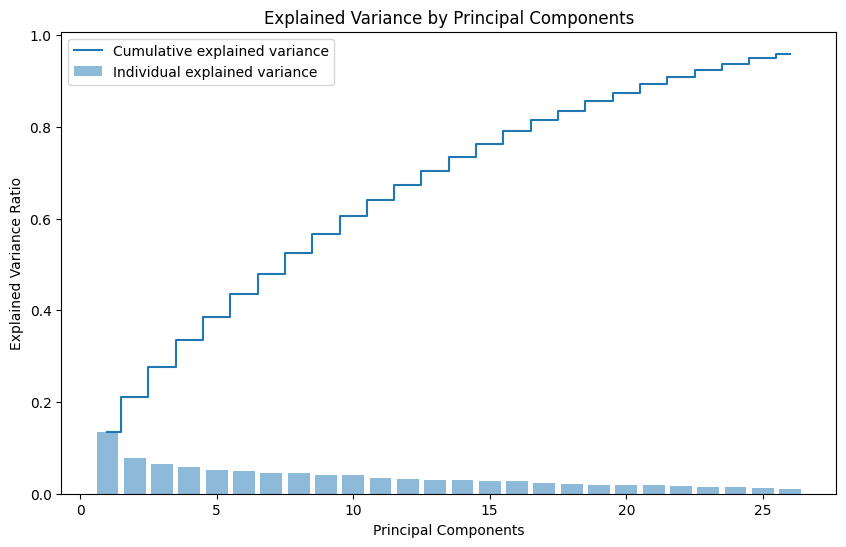

In [ ]:
# Explained variance by each component
explained_variance = pca_optimal.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = explained_variance.cumsum()

# Plot
plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()

# UPSAMPLING

In [ ]:
# Split the data: 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model parameters and pipeline

In [ ]:
from itertools import product
import time

In [ ]:
# Define hidden layer configurations
hidden_layer_configurations = [
    (50,),           # Single hidden layer with 50 neurons
    (100,),          # Single hidden layer with 100 neurons
    (100, 50),       # Two hidden layers with 100 and 50 neurons
    (100, 100),      # Two hidden layers with 100 neurons each
    (100, 50, 25)    # Three hidden layers with 100, 50, and 25 neurons
]

# Define alpha values for regularization
alpha_values = [0.0001, 0.001, 0.01]

# Create all combinations of hidden layers and alpha values
model_configs = list(product(hidden_layer_configurations, alpha_values))

# Display the configurations
print("Model Configurations:")
for config in model_configs:
    print(f"Hidden Layers: {config[0]}, Alpha: {config[1]}")


Model Configurations:
Hidden Layers: (50,), Alpha: 0.0001
Hidden Layers: (50,), Alpha: 0.001
Hidden Layers: (50,), Alpha: 0.01
Hidden Layers: (100,), Alpha: 0.0001
Hidden Layers: (100,), Alpha: 0.001
Hidden Layers: (100,), Alpha: 0.01
Hidden Layers: (100, 50), Alpha: 0.0001
Hidden Layers: (100, 50), Alpha: 0.001
Hidden Layers: (100, 50), Alpha: 0.01
Hidden Layers: (100, 100), Alpha: 0.0001
Hidden Layers: (100, 100), Alpha: 0.001
Hidden Layers: (100, 100), Alpha: 0.01
Hidden Layers: (100, 50, 25), Alpha: 0.0001
Hidden Layers: (100, 50, 25), Alpha: 0.001
Hidden Layers: (100, 50, 25), Alpha: 0.01


In [ ]:
import os

In [ ]:
# Define directories
results_dir = 'mlp_results1'
plots_dir = os.path.join(results_dir, 'plots')
metrics_file = os.path.join(results_dir, 'model_metrics.csv')

# Create directories if they don't exist
os.makedirs(plots_dir, exist_ok=True)

# Initialize the metrics CSV with headers if it doesn't exist
if not os.path.isfile(metrics_file):
    metrics_df = pd.DataFrame(columns=[
        'hidden_layer_sizes',
        'alpha',
        'Mean_Squared_Error',
        'R2_Score',
        'Final_Loss',
        'Training_Time_sec'
    ])
    metrics_df.to_csv(metrics_file, index=False)
    print(f"Created metrics file at {metrics_file}")
else:
    print(f"Metrics file already exists at {metrics_file}")


Created metrics file at mlp_results1/model_metrics.csv


In [ ]:
from multiprocessing import Process, Queue
from sklearn.exceptions import ConvergenceWarning

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("\nFeature scaling completed.")



Feature scaling completed.


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTrain-Test Split:")
print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")



Train-Test Split:
Training Samples: 53034
Testing Samples: 13259


In [ ]:
# Initialize the MLPRegressor
mlp = MLPRegressor(
    hidden_layer_sizes=(50,),  # Single hidden layer with 50 neurons
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=200,  # You can increase this if the model hasn't converged
    random_state=42,
    verbose=True,  # Set to False to reduce output
    early_stopping=True,  # Stop early if validation score is not improving
    validation_fraction=0.1,  # Use 10% of training data for validation
    n_iter_no_change=20  # Stop if no improvement for 20 iterations
)

# Train the model
print("\nTraining MLPRegressor...")
mlp.fit(X_train, y_train)
print("Training completed.")



Training MLPRegressor...
Iteration 1, loss = 6.46847741
Validation score: 0.523891
Iteration 2, loss = 1.52098961
Validation score: 0.540968
Iteration 3, loss = 1.49611635
Validation score: 0.543536
Iteration 4, loss = 1.48643369
Validation score: 0.545358
Iteration 5, loss = 1.48163449
Validation score: 0.548347
Iteration 6, loss = 1.47696234
Validation score: 0.549338
Iteration 7, loss = 1.47275726
Validation score: 0.549598
Iteration 8, loss = 1.46872182
Validation score: 0.549489
Iteration 9, loss = 1.46376682
Validation score: 0.549540
Iteration 10, loss = 1.46031159
Validation score: 0.551673
Iteration 11, loss = 1.45696653
Validation score: 0.551253
Iteration 12, loss = 1.45203877
Validation score: 0.552662
Iteration 13, loss = 1.45011094
Validation score: 0.551991
Iteration 14, loss = 1.44704116
Validation score: 0.554139
Iteration 15, loss = 1.44330953
Validation score: 0.552388
Iteration 16, loss = 1.43956821
Validation score: 0.554386
Iteration 17, loss = 1.43553443
Validat

In [ ]:
# Make predictions on the test set
y_pred = mlp.predict(X_test)


In [ ]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
Mean Squared Error (MSE): 2.6625
R² Score: 0.5884


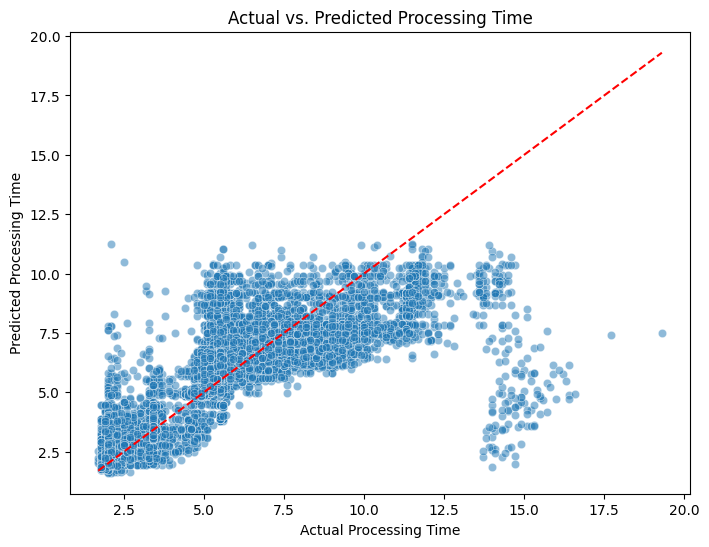

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Processing Time')
plt.ylabel('Predicted Processing Time')
plt.title('Actual vs. Predicted Processing Time')
plt.show()


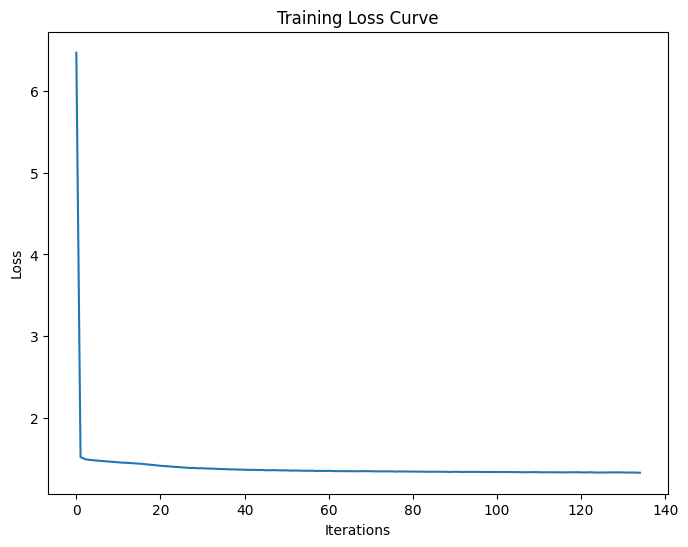

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()
